In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
import os 

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
%matplotlib inline

Using TensorFlow backend.


In [2]:
# plots images
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

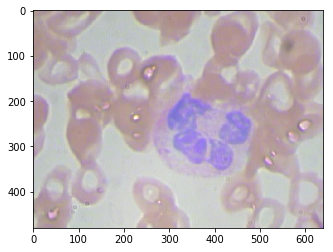

In [3]:
# example image

#bloodcell.jpg file should be in the same location as this notebook
if not os.path.isfile("bloodcell.jpg"):
    raise('no labels.csv file found')
image_path = 'bloodcell.jpg'
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0]);

## Testing Image Generator 

### Image Data Generator parameters
- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- shear_range is for randomly applying shearing transformations
- zoom_range is for randomly zooming inside pictures
- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift. (nearest is default)
- channel_shift_range: Float. Range for random channel shifts 

### flow method

flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None)

- Takes data & label arrays, generates batches of augmented data.

- x - input data e.g. image



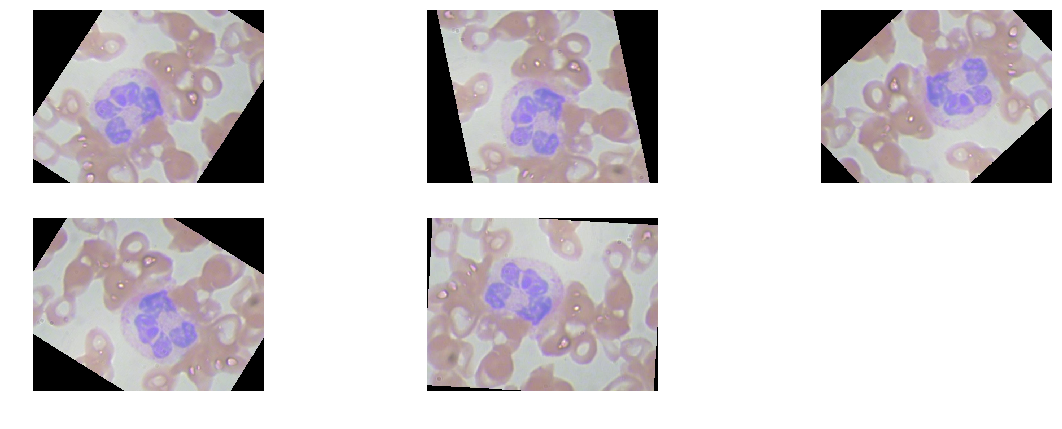

In [4]:
# rotation
gen = ImageDataGenerator(rotation_range=180,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(5)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('rotation');

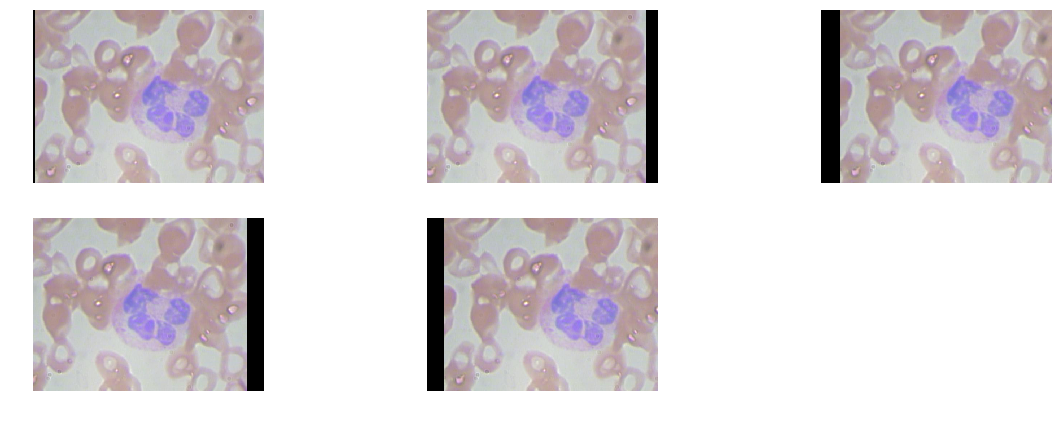

In [5]:
# width_shift_range
gen = ImageDataGenerator(width_shift_range=0.1,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(5)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Width Shift Range');

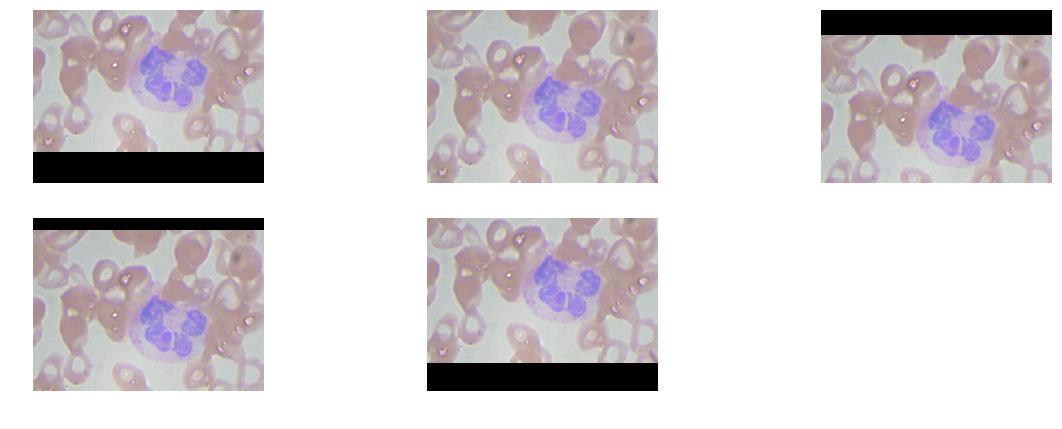

In [6]:
# height_shift_range
gen = ImageDataGenerator(height_shift_range=0.2,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(5)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Height Shift Range');

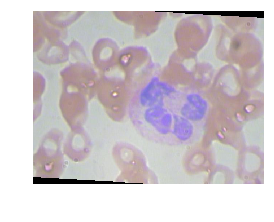

In [14]:
# shear range
gen = ImageDataGenerator(zoom_range=0.0,shear_range=10,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(1)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Shear range');

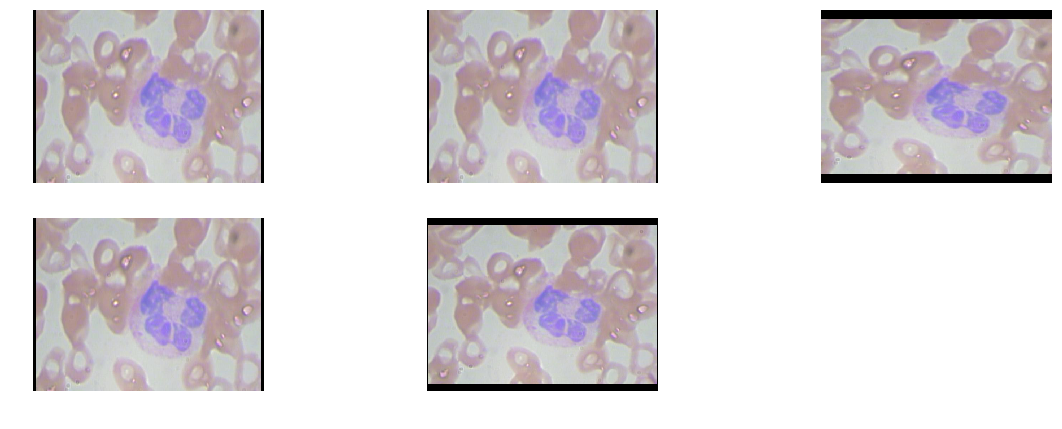

In [12]:
# zoom range
gen = ImageDataGenerator(zoom_range=0.2,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(5)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Width Shift Range');


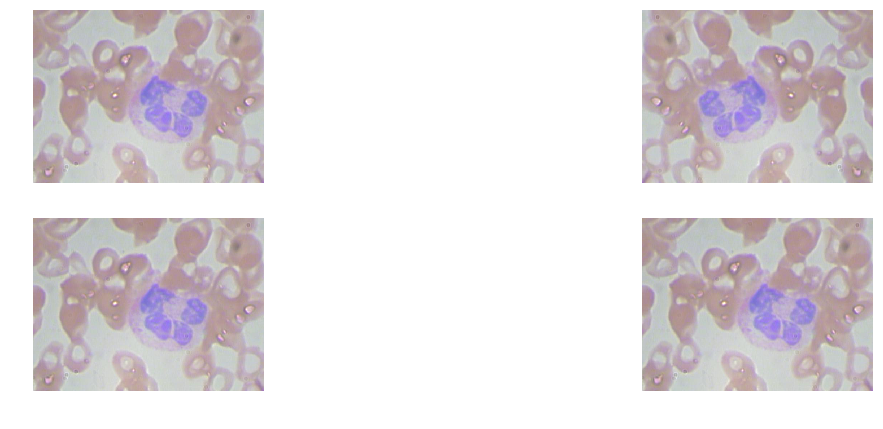

In [11]:
# horizontal_flip
gen = ImageDataGenerator(horizontal_flip=True,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(4)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Horizontal Filp');

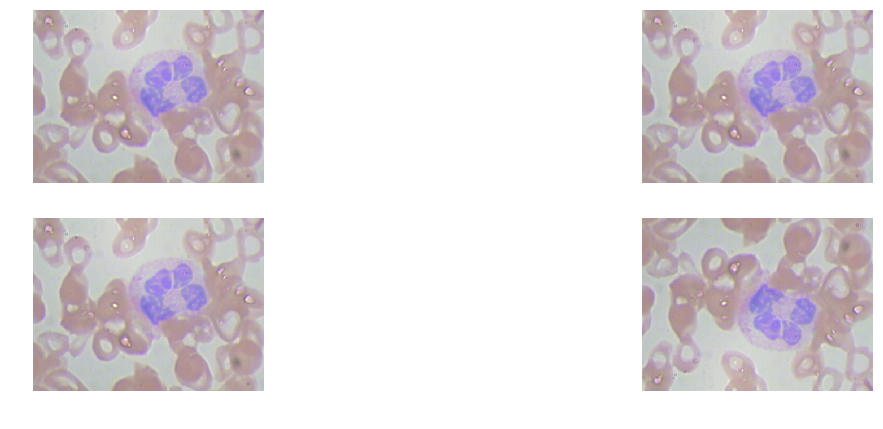

In [9]:
# vertical_flip
gen = ImageDataGenerator(vertical_flip=True,fill_mode = 'constant')
aimg = gen.flow(image,batch_size = 1)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(4)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Horizontal Filp');

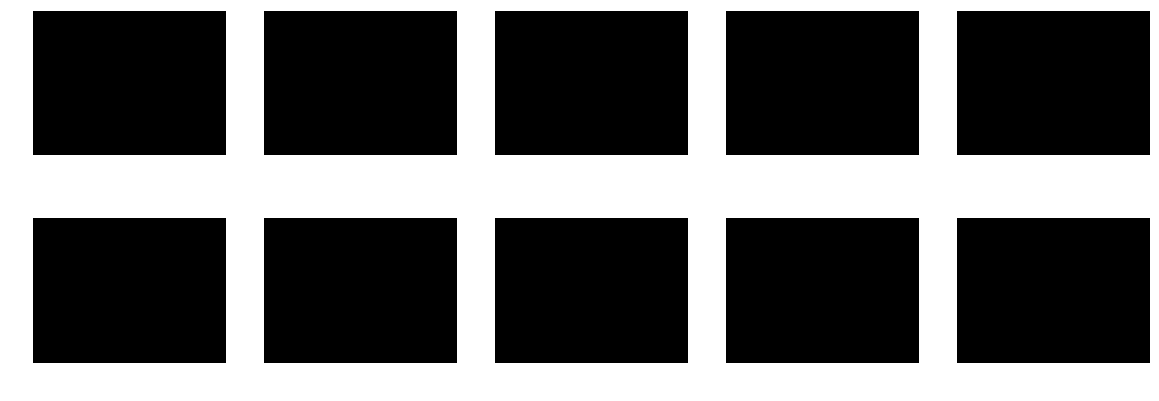

In [7]:
#rescale
gen = ImageDataGenerator(rescale=1./255)
aimg = gen.flow(image,batch_size = 1)
aug_images = [(next(aimg)[0]).astype(np.uint8) for i in range(10)]
plots(aug_images, figsize=(20,7), rows=2)
plt.xlabel('Channel Shift Range');

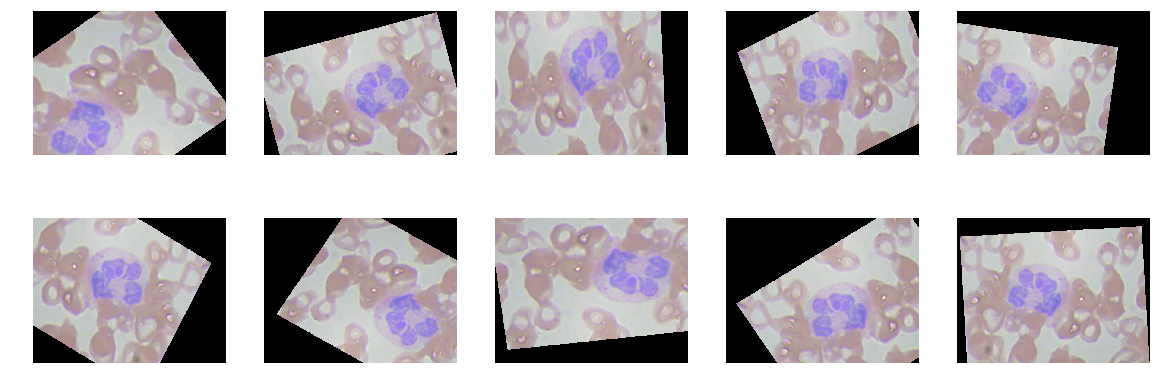

In [6]:
#tranformation preview
gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, vertical_flip = True,
        fill_mode='constant')

img = load_img('bloodcell.jpg')  
x = img_to_array(img)  # this is a Numpy array with shape (3, width, height)
x = x.reshape((1,) + x.shape)

aimg = gen.flow(image,batch_size = 10)
aug_images = [next(aimg)[0].astype(np.uint8) for i in range(10)]
plots(aug_images, figsize=(20,7), rows=2)
